## Converting fluid inclusion densities to depths
- Note, you will have to have CoolProp installed for this to work, if you have python installed through anaconda, conda install -c conda-forge coolprop in the command line normally works well

In [1]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

In [20]:
## Load some example data

data=pd.read_excel('Example_FI_Data.xlsx', sheet_name='New_Test')
data.head()

,FileName,Corrected_Splitting,T_K,Density_g_cm3,Unnamed: 4
0,03 LM0 G1 FI1,104.741634,1473.15,0.875343,623.416987
1,06 LM0 G2 FI1,104.502799,1473.15,0.780430,488.537029
2,11 LM0 G3 FI1 (CRR),104.900243,1473.15,0.928828,711.652960
3,13 LM0 G3 FI2,104.883879,1473.15,0.923662,702.721405
4,17 LM0 G3 FI3,104.925970,1473.15,0.936785,725.586902


In [37]:
6*20.1+1014

1134.6

In [38]:
14*20.1+1014

1295.4

## First up, convert splitting to depth using Cornell densimeter

In [39]:
densities=pf.calculate_density_cornell(temp='SupCrit', Split=data['Corrected_Splitting'])
densities.head()

,Preferred D,in range,Notes,LowD_RT,HighD_RT,LowD_SC,MedD_SC,HighD_SC,Temperature,Splitting,Preferred_D
0,0.875343,Y,"SupCrit, high density",0.749322,0.863306,0.760147,0.897269,0.875343,SupCrit,104.741634,NaN
1,0.780430,Y,"SupCrit, high density",0.660175,0.764221,0.670335,0.782274,0.780430,SupCrit,104.502799,NaN
2,0.928828,Y,"SupCrit, high density",0.808524,0.919902,0.819791,0.972519,0.928828,SupCrit,104.900243,NaN
3,0.923662,Y,"SupCrit, high density",0.802416,0.914403,0.813637,0.964813,0.923662,SupCrit,104.883879,NaN
4,0.936785,Y,"SupCrit, high density",0.818127,0.928390,0.829465,0.984604,0.936785,SupCrit,104.925970,NaN


## Using calculated densities

In [40]:
Densities=pf.convert_co2_density_depth_Coolprop(T_K=data['T_K'], 
                                   crust_dens_kgm3=2700,
                CO2_dens_gcm3=densities['Preferred D'], output='df')
Densities.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,6.234170,623.416988,23.560733,2700,1473.15,0.875343
1,4.885370,488.537029,18.463229,2700,1473.15,0.780430
2,7.116530,711.652960,26.895426,2700,1473.15,0.928828
3,7.027214,702.721405,26.557876,2700,1473.15,0.923662
4,7.255869,725.586902,27.422030,2700,1473.15,0.936785


## Monte Carlo Simulations for each FI
- Using three step density profile

In [41]:
Av_df_3step=pf.loop_all_FI_MC(T_K=1150+273.15,
                        CO2_density_gcm3=densities['Preferred D'],
                        sample_ID=data['FileName'],
                        crust_dens_kgm3='three-step', 
                         d1=5, d2=14, rho1=2700, rho2=3000,  rho3=3100,
                        N_dup=1000,
                        error_T_K=50, 
                        error_CO2_dens=0.017, 
                        error_crust_dens=0,
                    error_type_T_K='Abs', error_dist_T_K='normal',
                    error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
                    error_type_crust_dens='Abs',  error_dist_crust_dens='uniform',
                    plot_figure=False)
Av_df_3step.head()

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100
working on sample number 120


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,03 LM0 G1 FI1,20.727903,1.103343,6.016987,0.335196,6.037222,6.030256,20.794509,20.771581,50,0.017,0
1,06 LM0 G2 FI1,16.417555,0.898077,4.707503,0.272840,4.705120,4.697454,16.409714,16.384477,50,0.017,0
2,11 LM0 G3 FI1 (CRR),23.555944,1.226001,6.876146,0.372459,6.907017,6.895115,23.657562,23.618383,50,0.017,0
3,13 LM0 G3 FI2,23.269397,1.217963,6.789093,0.370017,6.784543,6.772522,23.254419,23.214853,50,0.017,0
4,17 LM0 G3 FI3,24.003105,1.248448,7.011993,0.379279,7.007237,7.002938,23.987450,23.973299,50,0.017,0


In [28]:
Av_df_3step=pf.loop_all_FI_MC(T_K=1150+273.15,
                        CO2_density_gcm3=densities['Preferred D'],
                        sample_ID=data['FileName'],
                        crust_dens_kgm3='ryan_lerner', 
                        N_dup=1000,
                        error_T_K=50, 
                        error_CO2_dens=0.017, 
                        error_crust_dens=0,
                    error_type_T_K='Abs', error_dist_T_K='normal',
                    error_type_CO2_dens='Norm', error_dist_CO2_dens='normal',
                    error_type_crust_dens='Abs',  error_dist_crust_dens='uniform',
                    plot_figure=False)
Av_df_3step.head()

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100
working on sample number 120


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,03 LM0 G1 FI1,22.329380,1.297630,6.016987,0.349666,6.035904,6.030667,22.399584,22.380150,50,0.017,0
1,06 LM0 G2 FI1,17.469812,1.071336,4.707503,0.289800,4.707819,4.691105,17.473315,17.408957,50,0.017,0
2,11 LM0 G3 FI1 (CRR),25.517768,1.391935,6.876146,0.375078,6.885288,6.889507,25.551696,25.567353,50,0.017,0
3,13 LM0 G3 FI2,25.194709,1.383318,6.789093,0.372756,6.791156,6.785476,25.202367,25.181287,50,0.017,0
4,17 LM0 G3 FI3,26.021906,1.421536,7.011993,0.383054,7.004623,6.997882,25.994552,25.969539,50,0.017,0


## Messing around with density profiles

In [35]:
help(pf.convert_pressure_to_depth)

Help on function convert_pressure_to_depth in module DiadFit.density_depth_crustal_profiles:

convert_pressure_to_depth(P_kbar=None, crust_dens_kgm3=None, g=9.81, d1=None, d2=None, rho1=None, rho2=None, rho3=None, model=None)
    Converts pressure in kbar to depth in km using a variety of crustal density profiles
    
    
    Parameters
    -----------
    
    P_kbar: int, float, pd.Series, np.ndarray
        Pressure in kbar
    
    g: float
        gravitational constant, in m/s2
    
    crust_dens_kgm3: float or str
        If float: Crustal density in kg/m3
    
        If model, choose from:
    
        ryan_lerner:
            Parameterization of Ryan 1987, actual equation from Lerner et al. 2021
            After 16.88 km (455 MPa), assume density is 2.746, as density turns around again. This profile is tweaked for Hawaii
    
        mavko_debari:
            Parameterization of Mavko and Thompson (1983) and DeBari and Greene (2011)
            as given in Putirka (2017) D

In [42]:
P_linspace=np.linspace(0, 10, 100)
Depth_calc_2step=pf.loop_pressure_depth_2step(P_kbar=P_linspace,
            d1=14, rho1=2800, rho2=3100)
Depth_calc_3step=pf.loop_pressure_depth_3step(P_kbar=P_linspace,
            d1=5, d2=14, rho1=2700, rho2=2900, rho3=3100)

depth_constant=10**(-3)*(P_linspace*100000000)/(2900*9.8)

Ryan_Lerner=pf.convert_pressure_to_depth(P_kbar=P_linspace, 
                                         model='ryan_lerner')

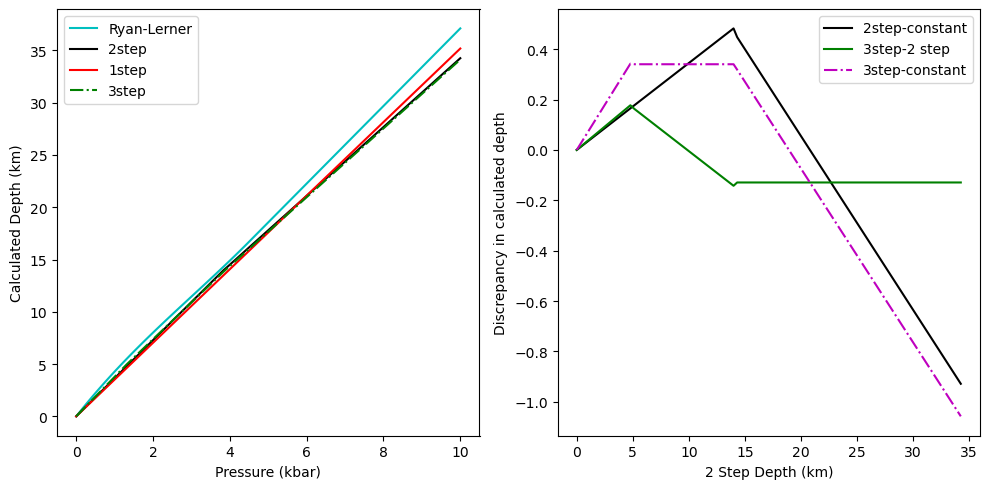

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(P_linspace, Ryan_Lerner, '-c', label='Ryan-Lerner')

ax1.plot(P_linspace, Depth_calc_2step, '-k', label='2step')
ax1.plot(P_linspace, depth_constant, '-r', label='1step')
ax1.plot(P_linspace, Depth_calc_3step, '-.g', label='3step')
ax1.legend()
ax2.plot(Depth_calc_2step, Depth_calc_2step-depth_constant, '-k', label='2step-constant')

ax2.plot(Depth_calc_2step, Depth_calc_3step-Depth_calc_2step, '-g', label='3step-2 step')
ax2.plot(Depth_calc_2step, Depth_calc_3step-depth_constant, '-.m', label='3step-constant')

ax2.legend()
ax2.set_ylabel('Discrepancy in calculated depth')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('2 Step Depth (km)')
ax1.set_ylabel('Calculated Depth (km)')
fig.tight_layout()